# Import Data Frame; Library; and Analysis

In [1]:
import pandas as pd                     # working with Data, like "Data Cleaning & Analysis" 
import numpy as np
import matplotlib.pyplot as plt         # General "Data Visualization" Library
import seaborn as sns                   # High-Level "Data Visualization" Library

In [2]:
df = pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


SOME ANALYSES

In [3]:
df.info()             # here, "Death Event" is "Class/Outcome"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.DEATH_EVENT.value_counts()        # to see NUMBER of DATA against DEATH_EVENT; "0-No", "1-Yes" (This is kind of IMBALANCE Data Set)

0    203
1     96
Name: DEATH_EVENT, dtype: int64

VISUAL ANALYSES by SEABORN

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

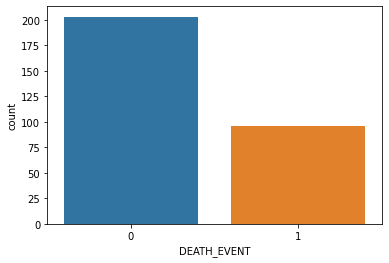

In [5]:
sns.countplot (x = 'DEATH_EVENT', data=df)               # here, x = "Death Event" which is "Class/Outcome"

<AxesSubplot:xlabel='anaemia', ylabel='count'>

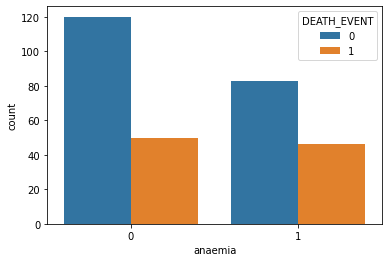

In [6]:
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df)   # here, x = "Independent var." & hue = "Class/Outcome or Dependent var."

In [7]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

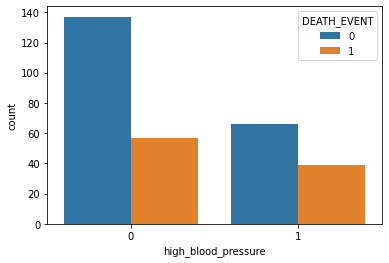

In [8]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)

In [9]:
df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

<AxesSubplot:xlabel='smoking', ylabel='count'>

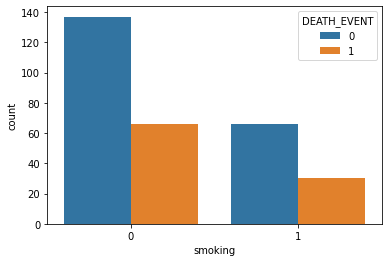

In [10]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)

In [11]:
#https://archive.ics.uci.edu/ml/index.php

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Model Selection (Decision Tree)

SEPARATION OF X & Y

In [13]:
x = df.drop('DEATH_EVENT', axis=1)               # axis=1 means -> Column 
y = df[['DEATH_EVENT']]

In [14]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [15]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


SPLIT DATASET to SEPARATE "Testing" & "Training"

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y, random_state=42, test_size=0.30)    #training data = 70%
# "random_state" is used to keep the 42 number "test, train combination fixed"
# it will help fixing the accuracy for every time model run
#https://www.youtube.com/watch?v=5SNSmnPXODM

In [18]:
xtrain.shape

(209, 12)

In [19]:
ytrain.shape

(209, 1)

In [20]:
xtest.shape

(90, 12)

In [21]:
ytest.shape

(90, 1)

DECISION TREE CLASSIFIER (Machine Learning Algorithm)

In [22]:
from sklearn.tree import DecisionTreeClassifier           # importing "Decision Tree Classifier"

In [23]:
clf = DecisionTreeClassifier()                            # creating ML object

In [24]:
clf.fit (xtrain, ytrain)                                  # fitting the ML object

DecisionTreeClassifier()

PREDICTION

In [25]:
pred = clf.predict(xtest)                                        # we will get predicted "ytest" results
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [26]:
ytest                                                     # This is real data "ytest"

,DEATH_EVENT
281,0
265,0
164,1
9,1
77,0
...,...
132,0
72,1
15,1
10,1


# Evaluation (Score, Accuracy, ROC, etc.)

# classification_report

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(ytest, pred))            # "ytest = actual output" & "pred = predicted output"

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        53
           1       0.66      0.51      0.58        37

    accuracy                           0.69        90
   macro avg       0.68      0.66      0.67        90
weighted avg       0.68      0.69      0.68        90



# confusion_matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(ytest, pred) 

array([[43, 10],
       [18, 19]], dtype=int64)

In [31]:
TP, FP, FN, TN = confusion_matrix(ytest, pred).reshape(-1)

In [32]:
TP

43

In [33]:
FP

10

In [34]:
FN

18

In [35]:
TN

19

# Accuracy

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(ytest, pred)

0.6888888888888889

In [38]:
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Accuracy

0.6888888888888889

# Precision or Positive Predictive Value (PPV)

In [39]:
from sklearn.metrics import precision_score

In [40]:
precision_score(ytest, pred)

0.6551724137931034

In [41]:
Precision = TP/(TP+FP)
Precision

0.8113207547169812

##Why I get different values here, Please make your valuable comments

# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)

In [42]:
from sklearn.metrics import recall_score

In [43]:
recall_score(ytest, pred)

0.5135135135135135

In [44]:
Recall = TP/(TP+FN)
Recall

0.7049180327868853

##Why I get different values here, Please make your valuable comments

# Harmonic Mean, F1 Score

In [45]:
from sklearn.metrics import f1_score

In [46]:
f1_score(ytest, pred)

0.5757575757575758

In [47]:
f1 = (2*Precision*Recall)/(Precision+Recall)
f1

0.7543859649122806

##Why I get different values here, Please make your valuable comments

# Specificity or True Negative Rate (TNR)

In [48]:
Specificity = TN/(TN+FP)
Specificity

0.6551724137931034

# 1-Specificity or False Positive Rate (FPR)

In [49]:
FPR = FP/(FP+TN)
FPR

0.3448275862068966

# Threat Score or Critical Success Index (CSI)

In [50]:
CSI = TP/(TP+FN+FP)
CSI

0.6056338028169014

# False Discovery Rate (FDR)

In [51]:
FDR = FP/(TP+FP)
FDR

0.18867924528301888

# ROC Curve

In [52]:
from sklearn.metrics import plot_roc_curve

C:\Users\Sajib Khan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


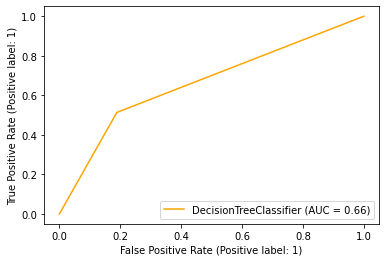

In [53]:
plot_roc_curve(clf, xtest, ytest, color='orange')     # (clf=algorithm), (xtest=input feature values for prediction), (ytest=actual value for checking with predicted results)

C:\Users\Sajib Khan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


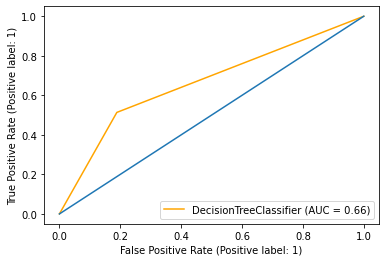

In [54]:
plot_roc_curve(clf, xtest, ytest, color='orange')
plt.plot([0,1], [0,1])            # plt.plot(x, y)  [0 & 1 are used as the renge of TPR & FPR "0 to 1"]